## Installing the **py7zr** library to unzip the train.7z from the cifar-10 dataset taken as input from kaggle

In [2]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 41.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 28.0 MB/s eta 0:00:00


## Unzipping the **train.7z** and saving it to the directory **/kaggle/working/**

In [3]:
import py7zr

# get the path of archive
archive_path = '/kaggle/input/cifar-10/train.7z'

archive = py7zr.SevenZipFile(archive_path, mode='r')

# Extracting the files from train.7z
archive.extractall(path="/kaggle/working/")
archive.close()

In [4]:
!ls

train


In [5]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [6]:
filename = os.listdir('/kaggle/working/train')

In [7]:
type(filename)

list

In [8]:
len(filename)

50000

In [9]:
print(filename[:5])

['8629.png', '14980.png', '5262.png', '1130.png', '19414.png']


In [10]:
print(filename[-5:])

['4434.png', '23636.png', '41151.png', '22549.png', '17914.png']


# Label Processing

In [11]:
labels_df = pd.read_csv('/kaggle/input/cifar-10/trainLabels.csv')

In [12]:
labels_df.shape

(50000, 2)

In [13]:
labels_df.head(100)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
...,...,...
95,96,frog
96,97,automobile
97,98,automobile
98,99,deer


In [14]:
labels_df[labels_df['id']==7796]

,id,label
7795,7796,frog


In [15]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [16]:
labels_df.tail()

,id,label
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [17]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [18]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

 ## Converting categorical labels into numerical values

In [19]:
labels_dictionary = {'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}

labels =  [labels_dictionary[i] for i in labels_df['label']]

In [20]:
print(labels[:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


In [21]:
import cv2
import matplotlib.pyplot as plt

def display_image(image_name):
   
    image_path = f"/kaggle/working/train/{image_name}.png"
    img = cv2.imread(image_path)
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width, _ = img.shape
    plt.figure(figsize=(width /50, height / 50))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

Chosing a random image and checking is it same as the label

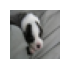

In [22]:
display_image("45888")

In [23]:
labels_df[labels_df['id'] == 45888]

,id,label
45887,45888,dog


In [24]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [25]:
id_list = list(labels_df['id'])

In [26]:
# Converting images to numpy array

train_data_folder = '/kaggle/working/train/'

data = []

for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [27]:
type(data)

list

In [28]:
len(data)

50000

In [29]:
# Cheking the type of the image --> 0.png 
type(data[0])

numpy.ndarray

In [30]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [31]:
data[0].shape

(32, 32, 3)

In [32]:
X = np.array(data)
Y = np.array(labels)

In [33]:
type(X)  , type(Y)

(numpy.ndarray, numpy.ndarray)

In [34]:
print(X.shape , Y.shape)

(50000, 32, 32, 3) (50000,)


# train test split

In [35]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 2)

In [36]:
print(X.shape , X_train.shape , X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [37]:
# Normalilsing the train and test Numpy arrays
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [38]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

In [39]:
Y_train

array([3, 8, 8, ..., 3, 0, 9])

# RESNET with distributed strategy

In [43]:
#Importing important libraries
import tensorflow as tf
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

In [44]:
# Setting up distributed strategy using MirroredStrategy()
strategy = tf.distribute.MirroredStrategy()
print(f"Number of devices: {strategy.num_replicas_in_sync}")

Number of devices: 2


# Creating Model using ResNet50 and Custom Layers

Now we will define model using a pre-trained **ResNet50** convolutional base and several custom layers for multi-class classification.

## Model Architecture

### 1. **Custom Layers Added: 12**
#### Before ResNet50
1. **3 UpSampling2D layers**
   - **Purpose**: Rescales the input image size by a factor of 2 for each layer.
   - **Why Added?** ResNet50 requires a specific input size, and these layers ensure smaller input images are appropriately upscaled to match the requirements.

#### After ResNet50
2. **1 Flatten layer**
   - **Purpose**: Converts the 2D feature maps from the convolutional base into a 1D vector.
   - **Why Added?** Fully connected layers require 1D inputs.

3. **3 BatchNormalization layers**
   - **Purpose**: Normalizes activations, ensuring faster convergence and preventing vanishing or exploding gradients.
   - **Why Added?** Stabilizes training and improves performance.

4. **2 Dense layers**
   - **128 neurons with ReLU activation**
   - **64 neurons with ReLU activation**
   - **Purpose**: Learns complex, high-level patterns from the extracted features.
   - **Why Added?** Provides the model with the capacity to adapt to the specific dataset.

5. **2 Dropout layers**
   - **Dropout Rate**: 50% (0.5)
   - **Purpose**: Regularizes the model to prevent overfitting by deactivating random neurons during training.
   - **Why Added?** Improves generalization and reduces reliance on specific neurons.

6. **1 Dense (Output Layer)**
   - **Number of neurons in the oputput layer**: 10 (corresponding to the number of classes).
   - **Activation Function**: Softmax.
   - **Purpose**: Outputs class probabilities for multi-class classification.
   - **Why Added?** Provides the final classification output.

### 2. **ResNet50 Layers Used: 50**
- **Pre-trained Convolutional Base**: The model uses the entire convolutional portion of ResNet50 (excluding the top fully connected layers).
- **Purpose**: Extracts features from images using pre-trained weights from ImageNet.
- **Why Added?** Saves training time and improves accuracy through transfer learning, leveraging ResNet50’s robust feature extraction capabilities.

## Model Compilation
- **Optimizer**: RMSprop with a learning rate of 2e-5.
  - **Why?** RMSprop works well for fine-tuning pre-trained networks by maintaining a small learning rate.
- **Loss Function**: Sparse categorical crossentropy.
  - **Why?** Suitable for multi-class classification with integer-encoded labels.
- **Metrics**: Accuracy (`acc`).
  - **Why?** Tracks model performance during training.

In [76]:
# Define the model within the strategy scope
with strategy.scope():
    convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
    convolutional_base.summary()

    num_of_classes = 10

    model = models.Sequential()
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(convolutional_base)
    model.add(layers.Flatten())
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(num_of_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [79]:
# Define callbacks for checkpoints and logging
checkpoint_cb = ModelCheckpoint(filepath='model_checkpoint.keras', 
                                 save_best_only=True, 
                                 monitor='val_acc', 
                                 mode='max')

csv_logger = CSVLogger('training_log.csv', append=True)

In [80]:
# GPU utilization monitoring
gpu_log_file = 'gpu_utilization.log'
with open(gpu_log_file, 'w') as f:
    f.write('Epoch, Batch, GPU Utilization (%)\n')

class GpuUtilizationLogger(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        gpu_utilization = tf.config.experimental.get_memory_info('GPU:0')['current'] / \
                          tf.config.experimental.get_memory_info('GPU:0')['peak'] * 100
        with open(gpu_log_file, 'a') as f:
            f.write(f"{epoch}, -, {gpu_utilization:.2f}\n")

## Training Started

In [82]:
history = model.fit(
    X_train_scaled,
    Y_train,
    validation_split=0.1,
    epochs=10,
    callbacks=[checkpoint_cb, csv_logger, GpuUtilizationLogger()]
)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 423s 376ms/step - acc: 0.6857 - loss: 1.0446 - val_acc: 0.8840 - val_loss: 0.4434
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 423s 375ms/step - acc: 0.7238 - loss: 0.9411 - val_acc: 0.8905 - val_loss: 0.4159
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 422s 375ms/step - acc: 0.7632 - loss: 0.8485 - val_acc: 0.8980 - val_loss: 0.3650
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 422s 375ms/step - acc: 0.7872 - loss: 0.7719 - val_acc: 0.9135 - val_loss: 0.3316
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 422s 375ms/step - acc: 0.8068 - loss: 0.7119 - val_acc: 0.9195 - val_loss: 0.3017
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 422s 375ms/step - acc: 0.8263 - loss: 0.6465 - val_acc: 0.9245 - val_loss: 0.2794
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 422s 375ms/step - acc: 0.8412 - loss: 0.6122 - val_acc: 0.9310 - val_loss: 0.2660
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 420s 373ms/step - acc: 0.8627 - loss: 0.5485 - val_acc: 0.9255 - val_loss: 0.2589
Epoch 9/

# Evalating The model for Test Accuracy

In [83]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 95ms/step - acc: 0.9248 - loss: 0.2543
Test Accuracy = 0.9305999875068665


# Plotting loss and validation accuracy

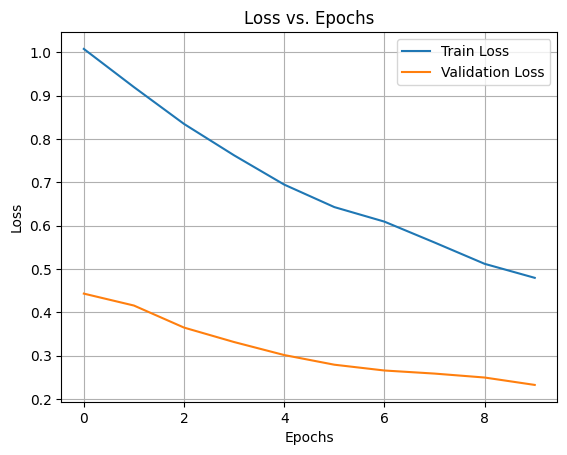

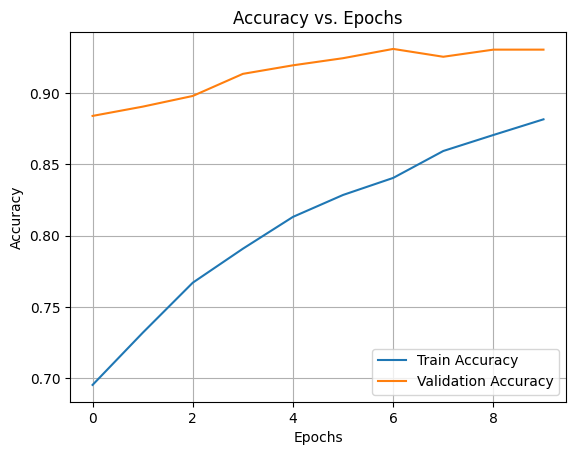

In [87]:
h = history

# Plot the loss value from training history
plt.plot(h.history['loss'], label='Train Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)  
plt.show()

# Plot the accuracy value from training history
plt.plot(h.history['acc'], label='Train Accuracy')
plt.plot(h.history['val_acc'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)  
plt.show()

In [89]:
model.save('cifar_resnet.keras')

In [92]:
import os
os.chdir(r'/kaggle/working')

In [95]:
from IPython.display import FileLink
FileLink(r'cifar_resnet.keras')

/kaggle/working/cifar_resnet.keras